<a href="https://colab.research.google.com/github/yiwooil/colab/blob/main/CV_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import random
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 20141006175.jpg to 20141006175.jpg


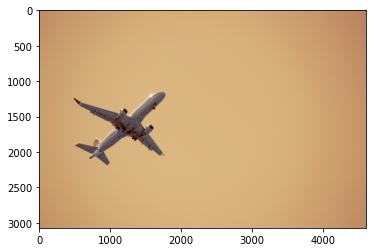

In [ ]:
img = cv2.imread('20141006175.jpg')
plt.imshow(img)

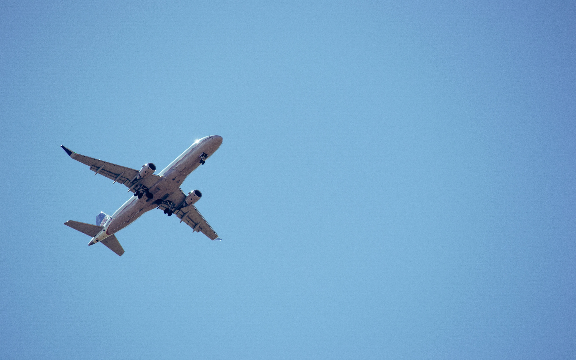

In [ ]:
resize_img = cv2.resize(img, (576,360))
cv2_imshow(resize_img)

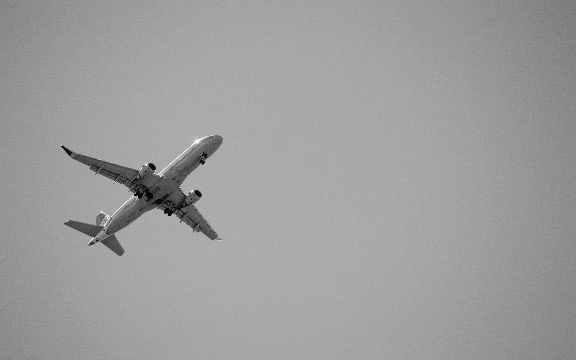

In [ ]:
gray = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray')
cv2_imshow(gray)

In [ ]:
height = gray.shape[0]
width = gray.shape[1]

img_01 = np.zeros((height, width))
img_02 = np.zeros((height, width))
img_03 = np.zeros((height, width))

print(gray.shape, img_01.shape)
#plt.imshow(img_01, cmap='gray')
#cv2_imshow(img_01)


(360, 576) (360, 576)


In [ ]:
h_filter = np.array(
            [[-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]]
            )
v_filter = np.array(
            [[-1, -1, -1],
            [0, 0, 0],
            [1, 1, 1]]
            )
for y in range(height):
    for x in range(width):
        if y>0 and y<height-1:
            if x>0 and x<width-1:
                h_val = np.sum(h_filter*gray[y-1:y+2,x-1:x+2])
                img_01[y,x] = h_val
                v_val = np.sum(v_filter*gray[y-1:y+2,x-1:x+2])
                img_02[y,x] = v_val
                x_val = np.sqrt(h_val*h_val + v_val*v_val)
                if x_val<100:
                    x_val = 0
                if x_val>255:
                   x_val = 255
                img_03[y,x] = x_val

In [ ]:
y=1
x=1
print(gray[y-1:y+2,x-1:x+2])
print(h_filter)
print(v_filter)
print(h_filter*gray[y-1:y+2,x-1:x+2])
print(v_filter*gray[y-1:y+2,x-1:x+2])
print(np.sum(h_filter*gray[y-1:y+2,x-1:x+2]))
print(np.sum(v_filter*gray[y-1:y+2,x-1:x+2]))

[[130 139 140]
 [136 129 129]
 [132 143 131]]
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[-130    0  140]
 [-136    0  129]
 [-132    0  131]]
[[-130 -139 -140]
 [   0    0    0]
 [ 132  143  131]]
2
-3


In [ ]:
gray[y-1:y+2,x-1:x+2]

array([[130, 139, 140],
       [136, 129, 129],
       [132, 143, 131]], dtype=uint8)

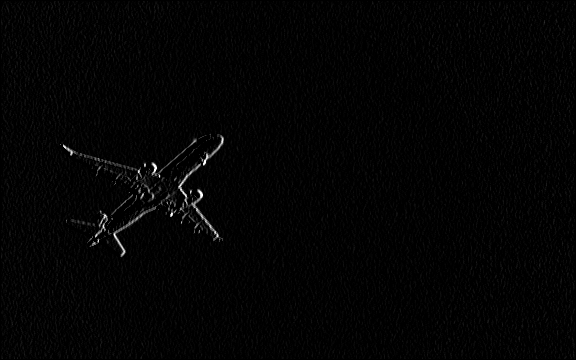

In [ ]:
#plt.imshow(img_01, cmap='gray')
cv2_imshow(img_01)

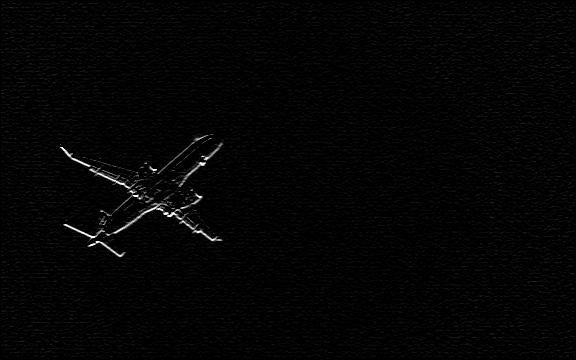

In [ ]:
#plt.imshow(img_02, cmap='gray')
cv2_imshow(img_02)

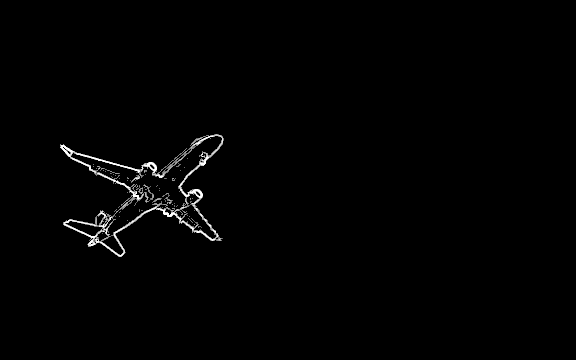

In [ ]:
cv2_imshow(img_03)